In [969]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras
import sklearn
from sklearn.model_selection import train_test_split

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


In [970]:
!rm -rf ./logs/

In [971]:
data=pd.read_csv('Parametros_de_todos.csv')

In [972]:
data

,Altura (m),Comprimento médio passo completo,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Comprimento médio de meio passo em metros,Erro absoluto médio do meio comprimento de passo em metros,Desvio padrão do comprimento médio de meio passo em metros,Desvio padrão do erro de comprimento de meio passo em metros,Comprimento do Swing em metros,...,Distância inicial do pé em metros,Erro absoluto médio da distância entre os pés em metros,Desvio padrão da distância inicial entre os pés,Desvio padrão do erro da distância inicial entre os pés em metros,Ângulo real de abertura das pernas em graus,Ângulo médio de abertura das pernas em graus,Erro absoluto médio do angulo entre as pernas em graus,Desvio padrão do ângulo médio dos passos em graus,Número de amostras do ângulo,Deficiência
0,1.7690,1.0644,0.1356,0.2450,0.21,0.5347,0.0653,0.1400,0.1254,0.5281,...,0.1600,0.0150,0.0075,0.0075,33.8671,27.1121,6.7549,6.5828,15,0
1,1.7463,1.0707,0.0007,0.3917,0.20,0.5353,0.0003,0.2008,0.1102,0.5401,...,0.1941,0.0191,0.0096,0.0096,29.8176,26.8024,3.0153,9.3831,8,0
2,1.7394,0.9800,0.0200,0.2718,0.18,0.4900,0.0100,0.1423,0.0978,0.5100,...,0.1414,0.0336,0.0168,0.0168,28.0941,25.1114,2.9827,6.5802,18,0
3,1.7448,0.9973,0.2027,0.3144,0.28,0.4996,0.1004,0.1671,0.1472,0.5232,...,0.1572,0.0178,0.0089,0.0089,33.8671,25.4250,8.4420,7.9330,21,0
4,1.7532,0.9237,0.2763,0.3203,0.32,0.4500,0.1500,0.1710,0.1693,0.4580,...,0.1731,0.0019,0.0009,0.0009,33.8671,23.1380,10.7291,8.2333,23,0
5,1.7237,0.8789,0.1211,0.1916,0.13,0.4394,0.0606,0.1054,0.0781,0.4240,...,0.1758,0.0008,0.0004,0.0004,28.0941,22.9306,5.1635,5.1038,12,0
6,1.7317,0.7449,0.0551,0.2055,0.14,0.3791,0.0209,0.1045,0.0737,0.4079,...,0.1990,0.0240,0.0120,0.0120,22.3930,20.0455,2.3476,5.2166,9,0
7,1.6871,0.7648,0.0352,0.0245,0.02,0.3791,0.0209,0.0148,0.0137,0.3801,...,0.1309,0.0441,0.0221,0.0221,22.3930,20.2036,2.1894,0.7269,7,0
8,1.7292,0.6887,0.1113,0.1710,0.16,0.3443,0.0557,0.0875,0.0763,0.3386,...,0.1800,0.0050,0.0025,0.0025,22.3930,18.3793,4.0137,4.4645,18,0
9,1.7244,0.7030,0.0970,0.1434,0.14,0.3515,0.0485,0.0730,0.0654,0.3503,...,0.2091,0.0241,0.0120,0.0120,22.3930,18.7675,3.6255,3.7123,20,0


In [973]:
dataset=data.values

In [974]:
dataset

array([[1.76900e+00, 1.06440e+00, 1.35600e-01, 2.45000e-01, 2.10000e-01,
        5.34700e-01, 6.53000e-02, 1.40000e-01, 1.25400e-01, 5.28100e-01,
        7.19000e-02, 1.48600e-01, 1.20500e-01, 5.42200e-01, 5.78000e-02,
        1.29200e-01, 1.26000e-01, 1.60000e-01, 1.50000e-02, 7.50000e-03,
        7.50000e-03, 3.38671e+01, 2.71121e+01, 6.75490e+00, 6.58280e+00,
        1.50000e+01, 0.00000e+00],
       [1.74630e+00, 1.07070e+00, 7.00000e-04, 3.91700e-01, 2.00000e-01,
        5.35300e-01, 3.00000e-04, 2.00800e-01, 1.10200e-01, 5.40100e-01,
        1.00000e-04, 2.06400e-01, 1.17000e-01, 5.30500e-01, 5.00000e-04,
        1.94900e-01, 1.02600e-01, 1.94100e-01, 1.91000e-02, 9.60000e-03,
        9.60000e-03, 2.98176e+01, 2.68024e+01, 3.01530e+00, 9.38310e+00,
        8.00000e+00, 0.00000e+00],
       [1.73940e+00, 9.80000e-01, 2.00000e-02, 2.71800e-01, 1.80000e-01,
        4.90000e-01, 1.00000e-02, 1.42300e-01, 9.78000e-02, 5.10000e-01,
        1.00000e-02, 1.55400e-01, 1.00000e-01, 4.70000

In [975]:
x=dataset[:,0:25]
y=dataset[:,26]

In [1001]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

In [1003]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


In [1004]:
# %load_ext tensorboard

# Model

In [1005]:
model = Sequential([
    Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01), input_shape=(25,)),
    Dropout(0.3),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
#     Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.3),
# #     Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.3),
#   Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')])

In [1006]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.summary()


In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=10000,
          validation_data=(x_test, y_test)),
           callbacks=[tensorboard_callback])

Train on 5 samples, validate on 23 samples
Epoch 1/10000
5/5 [==============================] - 1s 104ms/step - loss: 0.8336 - accuracy: 1.0000 - val_loss: 1.2781 - val_accuracy: 0.9130
Epoch 2/10000
5/5 [==============================] - 0s 953us/step - loss: 0.8695 - accuracy: 1.0000 - val_loss: 1.3354 - val_accuracy: 0.9130
Epoch 3/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.9054 - accuracy: 1.0000 - val_loss: 1.3867 - val_accuracy: 0.9130
Epoch 4/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.8606 - accuracy: 1.0000 - val_loss: 1.4367 - val_accuracy: 0.9130
Epoch 5/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.7553 - accuracy: 1.0000 - val_loss: 1.4781 - val_accuracy: 0.9130
Epoch 6/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.7528 - accuracy: 1.0000 - val_loss: 1.5128 - val_accuracy: 0.9130
Epoch 7/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.7747 - accuracy: 1.0000 - val_lo

Epoch 59/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 1.0000 - val_loss: 1.7382 - val_accuracy: 0.9130
Epoch 60/10000
5/5 [==============================] - 0s 987us/step - loss: 0.4920 - accuracy: 1.0000 - val_loss: 1.7337 - val_accuracy: 0.9130
Epoch 61/10000
5/5 [==============================] - 0s 964us/step - loss: 0.4873 - accuracy: 1.0000 - val_loss: 1.7291 - val_accuracy: 0.9130
Epoch 62/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 1.0000 - val_loss: 1.7244 - val_accuracy: 0.9130
Epoch 63/10000
5/5 [==============================] - 0s 893us/step - loss: 0.4797 - accuracy: 1.0000 - val_loss: 1.7196 - val_accuracy: 0.9130
Epoch 64/10000
5/5 [==============================] - 0s 964us/step - loss: 0.4757 - accuracy: 1.0000 - val_loss: 1.7146 - val_accuracy: 0.9130
Epoch 65/10000
5/5 [==============================] - 0s 779us/step - loss: 0.4719 - accuracy: 1.0000 - val_loss: 1.7096 - val_accuracy: 0.9

Epoch 117/10000
5/5 [==============================] - 0s 876us/step - loss: 0.3135 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.9130
Epoch 118/10000
5/5 [==============================] - 0s 930us/step - loss: 0.3111 - accuracy: 1.0000 - val_loss: 1.5287 - val_accuracy: 0.9130
Epoch 119/10000
5/5 [==============================] - 0s 794us/step - loss: 0.3087 - accuracy: 1.0000 - val_loss: 1.5255 - val_accuracy: 0.9130
Epoch 120/10000
5/5 [==============================] - 0s 896us/step - loss: 0.3065 - accuracy: 1.0000 - val_loss: 1.5222 - val_accuracy: 0.9130
Epoch 121/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 1.0000 - val_loss: 1.5188 - val_accuracy: 0.9130
Epoch 122/10000
5/5 [==============================] - 0s 756us/step - loss: 0.3017 - accuracy: 1.0000 - val_loss: 1.5151 - val_accuracy: 0.9130
Epoch 123/10000
5/5 [==============================] - 0s 895us/step - loss: 0.2994 - accuracy: 1.0000 - val_loss: 1.5113 - val_accu

Epoch 174/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 1.0000 - val_loss: 1.4964 - val_accuracy: 0.9130
Epoch 175/10000
5/5 [==============================] - 0s 921us/step - loss: 0.2060 - accuracy: 1.0000 - val_loss: 1.4974 - val_accuracy: 0.9130
Epoch 176/10000
5/5 [==============================] - 0s 851us/step - loss: 0.2046 - accuracy: 1.0000 - val_loss: 1.4979 - val_accuracy: 0.9130
Epoch 177/10000
5/5 [==============================] - 0s 870us/step - loss: 0.2032 - accuracy: 1.0000 - val_loss: 1.4979 - val_accuracy: 0.9130
Epoch 178/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 1.0000 - val_loss: 1.4992 - val_accuracy: 0.9130
Epoch 179/10000
5/5 [==============================] - 0s 665us/step - loss: 0.2014 - accuracy: 1.0000 - val_loss: 1.5007 - val_accuracy: 0.9130
Epoch 180/10000
5/5 [==============================] - 0s 819us/step - loss: 0.1991 - accuracy: 1.0000 - val_loss: 1.5016 - val_accura

Epoch 231/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 1.0000 - val_loss: 1.4294 - val_accuracy: 0.9130
Epoch 232/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 1.0000 - val_loss: 1.4297 - val_accuracy: 0.9130
Epoch 233/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 1.0000 - val_loss: 1.4295 - val_accuracy: 0.9130
Epoch 234/10000
5/5 [==============================] - 0s 968us/step - loss: 0.1402 - accuracy: 1.0000 - val_loss: 1.4288 - val_accuracy: 0.9130
Epoch 235/10000
5/5 [==============================] - 0s 892us/step - loss: 0.1394 - accuracy: 1.0000 - val_loss: 1.4278 - val_accuracy: 0.9130
Epoch 236/10000
5/5 [==============================] - 0s 979us/step - loss: 0.1389 - accuracy: 1.0000 - val_loss: 1.4266 - val_accuracy: 0.9130
Epoch 237/10000
5/5 [==============================] - 0s 982us/step - loss: 0.1377 - accuracy: 1.0000 - val_loss: 1.4251 - val_accuracy

Epoch 288/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 1.3074 - val_accuracy: 0.9130
Epoch 289/10000
5/5 [==============================] - 0s 906us/step - loss: 0.1017 - accuracy: 1.0000 - val_loss: 1.3037 - val_accuracy: 0.9130
Epoch 290/10000
5/5 [==============================] - 0s 898us/step - loss: 0.1022 - accuracy: 1.0000 - val_loss: 1.3007 - val_accuracy: 0.9130
Epoch 291/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 1.0000 - val_loss: 1.2978 - val_accuracy: 0.9130
Epoch 292/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 1.0000 - val_loss: 1.2950 - val_accuracy: 0.9130
Epoch 293/10000
5/5 [==============================] - 0s 844us/step - loss: 0.0995 - accuracy: 1.0000 - val_loss: 1.2922 - val_accuracy: 0.9130
Epoch 294/10000
5/5 [==============================] - 0s 994us/step - loss: 0.0988 - accuracy: 1.0000 - val_loss: 1.2892 - val_accuracy

5/5 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 1.0000 - val_loss: 1.1296 - val_accuracy: 0.9130
Epoch 346/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 1.0000 - val_loss: 1.1343 - val_accuracy: 0.9130
Epoch 347/10000
5/5 [==============================] - 0s 905us/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 1.1379 - val_accuracy: 0.9130
Epoch 348/10000
5/5 [==============================] - 0s 901us/step - loss: 0.0745 - accuracy: 1.0000 - val_loss: 1.1410 - val_accuracy: 0.9130
Epoch 349/10000
5/5 [==============================] - 0s 988us/step - loss: 0.0740 - accuracy: 1.0000 - val_loss: 1.1434 - val_accuracy: 0.9130
Epoch 350/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 1.0000 - val_loss: 1.1457 - val_accuracy: 0.9130
Epoch 351/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 1.0000 - val_loss: 1.1473 - val_accuracy: 0.9130
Epoch 352

Epoch 403/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 1.0978 - val_accuracy: 0.9130
Epoch 404/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 1.0986 - val_accuracy: 0.9130
Epoch 405/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 1.0997 - val_accuracy: 0.9130
Epoch 406/10000
5/5 [==============================] - 0s 874us/step - loss: 0.0586 - accuracy: 1.0000 - val_loss: 1.1025 - val_accuracy: 0.9130
Epoch 407/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 1.1048 - val_accuracy: 0.9130
Epoch 408/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 1.1064 - val_accuracy: 0.9130
Epoch 409/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 1.1072 - val_accuracy: 0.91

5/5 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 1.0903 - val_accuracy: 0.9130
Epoch 461/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 1.0905 - val_accuracy: 0.9130
Epoch 462/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 1.0918 - val_accuracy: 0.9130
Epoch 463/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 1.0922 - val_accuracy: 0.9130
Epoch 464/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 1.0928 - val_accuracy: 0.9130
Epoch 465/10000
5/5 [==============================] - 0s 906us/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 1.0927 - val_accuracy: 0.9130
Epoch 466/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 1.0000 - val_loss: 1.0919 - val_accuracy: 0.9130
Epoch 467/100

Epoch 518/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 1.1097 - val_accuracy: 0.9130
Epoch 519/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 1.1063 - val_accuracy: 0.9130
Epoch 520/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 1.1029 - val_accuracy: 0.9130
Epoch 521/10000
5/5 [==============================] - 0s 955us/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 1.1005 - val_accuracy: 0.9130
Epoch 522/10000
5/5 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 1.0976 - val_accuracy: 0.9130
Epoch 523/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 1.0943 - val_accuracy: 0.9130
Epoch 524/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 1.0923 - val_accuracy: 0.91

Epoch 576/10000
5/5 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0174 - val_accuracy: 0.9130
Epoch 577/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 1.0194 - val_accuracy: 0.9130
Epoch 578/10000
5/5 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 1.0205 - val_accuracy: 0.9130
Epoch 579/10000
5/5 [==============================] - 0s 991us/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 1.0208 - val_accuracy: 0.9130
Epoch 580/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 1.0210 - val_accuracy: 0.9130
Epoch 581/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 1.0206 - val_accuracy: 0.9130
Epoch 582/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 1.0194 - val_accuracy: 0.91

5/5 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.9130
Epoch 634/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.9536 - val_accuracy: 0.9130
Epoch 635/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.9130
Epoch 636/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.9537 - val_accuracy: 0.9130
Epoch 637/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.9529 - val_accuracy: 0.9130
Epoch 638/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.9516 - val_accuracy: 0.9130
Epoch 639/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.9500 - val_accuracy: 0.9130
Epoch 640/10000

Epoch 691/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.9367 - val_accuracy: 0.9130
Epoch 692/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.9381 - val_accuracy: 0.9130
Epoch 693/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.9398 - val_accuracy: 0.9130
Epoch 694/10000
5/5 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.9413 - val_accuracy: 0.9130
Epoch 695/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.9434 - val_accuracy: 0.9130
Epoch 696/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.9447 - val_accuracy: 0.9130
Epoch 697/10000
5/5 [==============================] - 0s 968us/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.9451 - val_accuracy: 0.91

Epoch 749/10000
5/5 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.9700 - val_accuracy: 0.9130
Epoch 750/10000
5/5 [==============================] - 0s 875us/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.9668 - val_accuracy: 0.9130
Epoch 751/10000
5/5 [==============================] - 0s 884us/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.9630 - val_accuracy: 0.9130
Epoch 752/10000
5/5 [==============================] - 0s 961us/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.9587 - val_accuracy: 0.9130
Epoch 753/10000


In [996]:
 print("Perda: " + str(100*(model.evaluate(x_test,y_test)[0]))+" %")

26/26 [==============================] - 0s 79us/step
Perda: 141.0605788230896 %


In [997]:
 print("Precisão: " + str(100*(model.evaluate(x_test,y_test)[1]))+" %")

26/26 [==============================] - 0s 41us/step
Precisão: 92.30769276618958 %


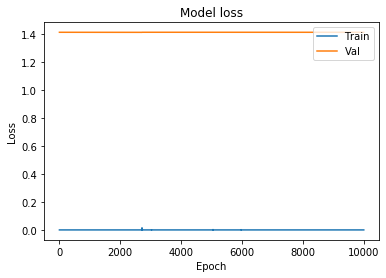

In [998]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Perdas.png")
plt.show()

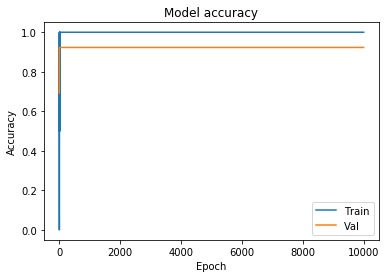

In [989]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Precisao.png")
plt.show()

In [990]:
model.save("Modelo_1")

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 32)                832       
_________________________________________________________________
dropout_49 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 100)               3300      
_________________________________________________________________
dropout_50 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 101       
Total params: 4,233
Trainable params: 4,233
Non-trainable params: 0
_________________________________________________________________


In [992]:
# %tensorboard --logdir logs

In [993]:
# from tensorboard import notebook
# notebook.list()

In [ ]:
# notebook.display(port=6006, height=1000) 